# First analysis

- source: https://archive.ics.uci.edu/ml/datasets/Cardiotocography#
- reference: *Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318*

The dataset consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians.

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. 

Classification was both with respect to a fetal state (N, S, P).

The dataset consists of the following features:

- **LB** - FHR baseline (beats per minute)
- **AC** - # of accelerations per second
- **FM** - # of fetal movements per second
- **UC** - # of uterine contractions per second
- **DL** - # of light decelerations per second
- **DS** - # of severe decelerations per second
- **DP** - # of prolongued decelerations per second
- **ASTV** - percentage of time with abnormal short term variability
- **MSTV** - mean value of short term variability
- **ALTV** - percentage of time with abnormal long term variability
- **MLTV** - mean value of long term variability
- **Width** - width of FHR histogram
- **Min** - minimum of FHR histogram
- **Max** - Maximum of FHR histogram
- **Nmax** - # of histogram peaks
- **Nzeros** - # of histogram zeros
- **Mode** - histogram mode
- **Mean** - histogram mean
- **Median** - histogram median
- **Variance** - histogram variance
- **Tendency** - histogram tendency

Targets:
- **NSP** - fetal state class code (N=normal; S=suspect; P=pathologic)

# Preliminary tasks

## Import packages

Import useful packages

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score

# For dimensionality reduction
from sklearn.decomposition import PCA

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 17

result_path = "../results/"

## Import data

Import data from Excel file CTG.xls

In [2]:
data_path = "../data/"
filename = "CTG.xls"

fetus = pd.read_excel(data_path+filename, sheet_name = "Data",header=1)
fetus.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240,357,0,0,0,0,0,0,0,NaN,...,-1,-1,-1,-1,1,-1,NaN,9,NaN,2
1,5,632,4,0,4,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
2,177,779,2,0,5,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
3,411,1192,2,0,6,2,0,0,0,NaN,...,-1,1,-1,-1,-1,-1,NaN,6,NaN,1
4,533,1147,4,0,5,0,0,0,0,NaN,...,-1,-1,-1,-1,-1,-1,NaN,2,NaN,1


In [3]:
# Columns to be considered in the dataset
columns = ["LB", "AC", "FM", "UC", "DL", "DS", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]

In [4]:
X = fetus[columns]
y = fetus["NSP"]
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120,0,0,0,0,0,0,73,0.5,43,...,64,62,126,2,0,120,137,121,73,1
1,132,4,0,4,2,0,0,17,2.1,0,...,130,68,198,6,1,141,136,140,12,0
2,133,2,0,5,2,0,0,16,2.1,0,...,130,68,198,5,1,141,135,138,13,0
3,134,2,0,6,2,0,0,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,4,0,5,0,0,0,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1


The dataset consists of 21 features and 2126 entries, all non-null.

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   DL        2126 non-null   int64  
 5   DS        2126 non-null   int64  
 6   DP        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [6]:
X.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,1.570085,0.003293,0.126058,46.990122,1.332785,9.84666,...,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320
std,9.840844,3.560850,37.125309,2.847094,2.499229,0.057300,0.464361,17.192814,0.883241,18.39688,...,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,61.000000,1.700000,11.00000,...,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000
max,160.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,87.000000,7.000000,91.00000,...,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


## Data analysis

Analysing data, it has been possible to observe that DS feature is not very meaningful

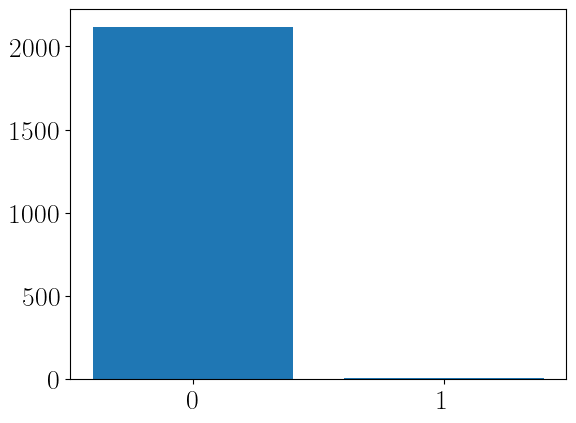

In [7]:
fig, ax = plt.subplots()

ax.bar(np.arange(2),fetus.groupby(by="DS").size())
ax.set_xticks(np.arange(2)) 

In [8]:
columns = ["LB", "AC", "FM", "UC", "DL", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]
X = fetus[columns]

## Finding outliers

Checking the statistical description of the scaled dataset, in particular minimimu and maximum values, it is possible to detect some outliers. An outlier is defined as a point in the dataset whose shift from the mean is 3 times greater than the standard deviation. Employing the Z-score, defined as follows:

$z = \frac{x-\mu}{\sigma}$ where $\mu$ is the mean and $\sigma$ is the standard deviation,

an outlier is a point with an absolute value of Z-score greater than 3.


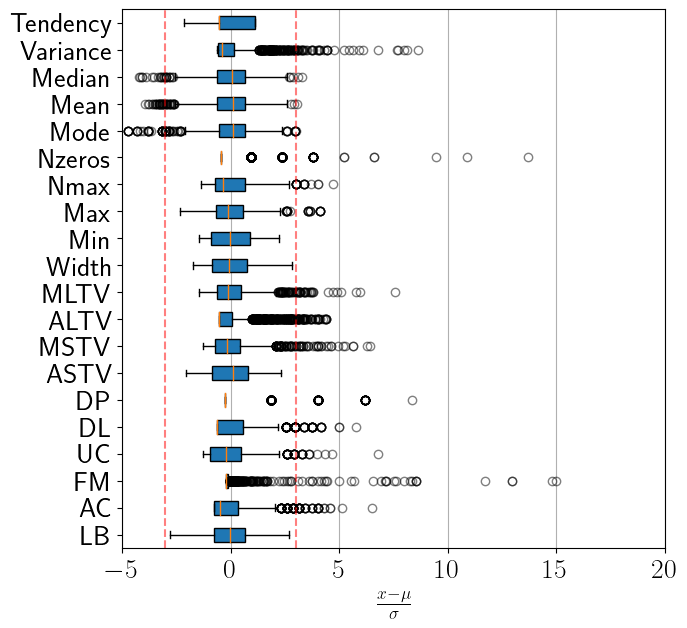

In [9]:
fig, ax = plt.subplots(figsize=(7,7))

m = X.mean()
s = X.std()

bp = plt.boxplot((X-m)/s,labels=columns,vert=0,patch_artist = True)
ax.axvline(3, c = "red", linestyle="--", alpha = 0.5)
ax.axvline(-3, c = "red", linestyle="--", alpha = 0.5)
ax.set_xlim(-5,20)
plt.xlabel(r'$\frac{x-\mu}{\sigma}$', fontsize=18)
plt.gca().xaxis.grid(True)

# source for aestetic improvements: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
for dot in bp['fliers']:
    dot.set(marker ='o',
              color ='lightgrey',
              alpha = 0.5)
# plt.savefig(result_path+"/outliers")    

### Treating outliers

The treatment of outliers is carried out on the basis of the standard methodology, which involves the exclusion from the dataset of all those points whose value deviates from the mean by more than 3 times the standard deviation. In what follows, the *Xnout* dataset is defined by excluding all such points.

In [10]:
from scipy import stats

threshold = 5

dfnout = pd.concat((X,y),axis=1)
X_no_outliers = X[(np.abs(stats.zscore(X)) < threshold).all(axis=1)]
dfnout = dfnout[dfnout.index.isin(X_no_outliers.index)]

Xnout = dfnout[columns]
ynout = dfnout["NSP"]

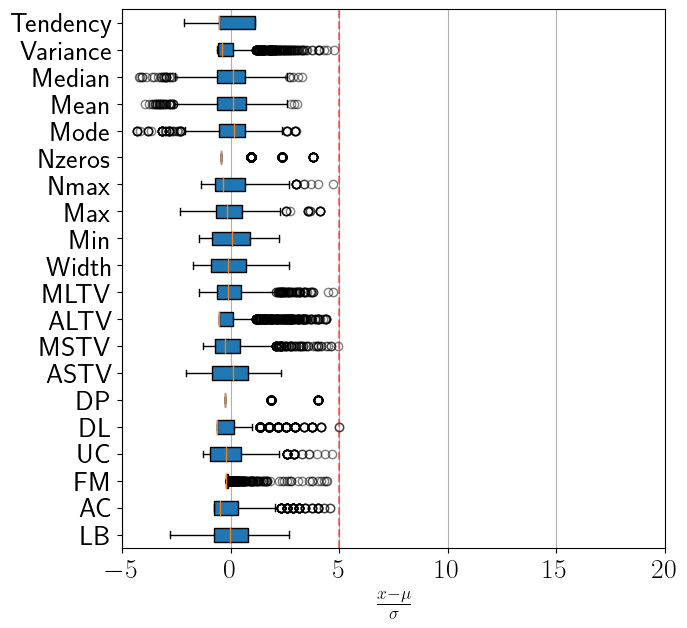

In [11]:
fig, ax = plt.subplots(figsize=(7,7))

bp = plt.boxplot((Xnout-m)/s,labels=columns,vert=0,patch_artist = True)
ax.axvline(threshold, c = "red", linestyle="--", alpha = 0.5)
ax.axvline(-threshold, c = "red", linestyle="--", alpha = 0.5)
ax.set_xlim(-5,20)
plt.xlabel(r'$\frac{x-\mu}{\sigma}$', fontsize=18)
plt.gca().xaxis.grid(True)

# source for aestetic improvements: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
for dot in bp['fliers']:
    dot.set(marker ='o',
              color ='lightgrey',
              alpha = 0.5)
#plt.savefig(result_path+"/no_outliers")    

In [12]:
print("Dimension of the dataset with outliers: %.0f" % X.shape[0])
print("Dimension of the dataset without outliers: %.0f" % Xnout.shape[0])
print("Number of outliers: %.0f" % (X.shape[0]-Xnout.shape[0]))

Dimension of the dataset with outliers: 2126
Dimension of the dataset without outliers: 2059
Number of outliers: 67


## Imbalanced classes

Text(0.5, 0, 'NSP')

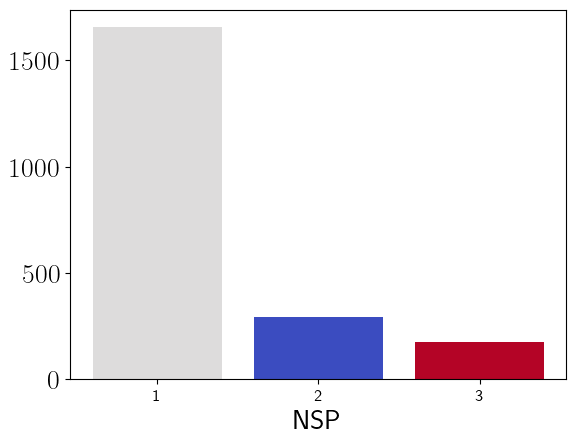

In [13]:
# colormap source: https://stackoverflow.com/questions/64068659/bar-chart-in-matplotlib-using-a-colormap
my_cmap = plt.get_cmap("coolwarm")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

#fig, ax = plt.subplots(1,2,figsize = (10,5))

#ax[0].bar(np.arange(1,4),fetus.groupby(by="NSP").size(),color=my_cmap(rescale(fetus["NSP"].unique())))
#ax[1].bar(np.arange(1,11),fetus.groupby(by="CLASS").size(),color=my_cmap(rescale(fetus["CLASS"].unique())))

#ax[0].set_xticks(np.arange(1,4)) 
#ax[0].set_xticklabels(np.arange(1,4), fontsize=12)
#ax[0].set_xlabel("NSP")
#ax[1].set_xticks(np.arange(1,11)) 
#ax[1].set_xticklabels(np.arange(1,11), fontsize=12)
#ax[1].set_xlabel("CLASS");


fig, ax = plt.subplots()
ax.bar(np.arange(1,4),fetus.groupby(by="NSP").size(),color=my_cmap(rescale(fetus["NSP"].unique())))
ax.set_xticks(np.arange(1,4)) 
ax.set_xticklabels(np.arange(1,4), fontsize=12)
ax.set_xlabel("NSP")
#plt.savefig(result_path+"/imb_classes") 
  

### First approach: subsampling the classes

As seen above, the dataset shows a strong imbalance between classes. In particular, the least populous class has 176 items.
One strategy for assessing the sensitivity to this dataset is to randomly subsample the other classes, such that they all have the same number of elements.

In [14]:
f = pd.concat((X,y),axis=1)

f1 = f[f["NSP"] == 1]
f2 = f[f["NSP"] == 2]
f3 = f[f["NSP"] == 3]

print("Elements in class 1: %.0f"%f1["NSP"].count())
print("Elements in class 2: %.0f"%f2["NSP"].count())
print("Elements in class 3: %.0f"%f3["NSP"].count())

Elements in class 1: 1655
Elements in class 2: 295
Elements in class 3: 176


The objective is therefore to resize classes 1 and 3 to obtain the same number of elements as class 3. This greatly reduces the size of the dataset (introducing possible underfitting problems), but could help to prevent problems of unbalancing the models towards the larger class.

In [15]:
n = 176 # number of elements for subsampled sets

# Subsample the two larger classes
f1_sub = f1.sample(n=n,random_state=34, axis=0)
f2_sub = f2.sample(n=n,random_state=34, axis=0)

# concat the subsamples datasets
f_sub = pd.concat([f1_sub,f2_sub,f3],axis=0,join="outer")
# shuffles the elements
f_sub = f_sub.sample(frac=1).reset_index(drop=True)

# Define features and target sets
y_sub = f_sub["NSP"]
X_sub = f_sub.drop(labels="NSP",axis=1)

### Second approach: oversampling the classes

In [16]:
n = 1655

# Oversample the two larger classes
f2_over = f2.sample(n, random_state=34, replace=True)
f3_over = f3.sample(n, random_state=34, replace=True)

# concat the subsamples datasets
f_over = pd.concat([f1,f2_over,f3_over],axis=0,join="outer")
# shuffles the elements
f_over = f_over.sample(frac=1).reset_index(drop=True)

# Define features and target sets
y_over = f_over["NSP"]
X_over = f_over.drop(labels="NSP",axis=1)

### Third approach: SMOTE

The third techinque to treat umbalanaced technique is SMOTE, from the package imblearn.

*Source*: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [17]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state= 31)

# Datasets with SMOTE applied
X_sm, y_sm = sm.fit_resample(X,y)

# Baseline model: KNN

BASELINE - KNN classifier
5-NN Accuracy: 0.91, Recall: 0.83
6-NN Accuracy: 0.91, Recall: 0.85
7-NN Accuracy: 0.90, Recall: 0.83
8-NN Accuracy: 0.89, Recall: 0.82
9-NN Accuracy: 0.90, Recall: 0.83
10-NN Accuracy: 0.89, Recall: 0.82


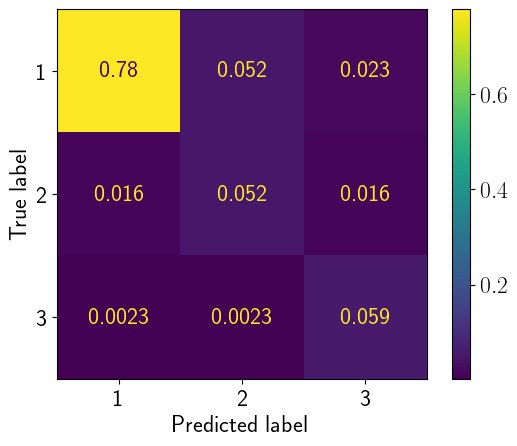

In [39]:
# Split in train and test dataset (with and without Standard Scaler application)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=35)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X,y,train_size=0.8,random_state=35)

print("BASELINE - KNN classifier")
for neighbours in range(5,11): # trying different 

    KNN = KNeighborsClassifier(n_neighbors = neighbours)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)

    print("%.0f-NN Accuracy: %.2f, Recall: %.2f" % (neighbours,accuracy_score(y_pred,y_test),recall_score(y_pred,y_test,average="macro")) )

cm = confusion_matrix(y_pred, y_test,normalize="all")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_);
disp.plot()

plt.savefig(result_path+"/knn_cm") 

# Decision Tree

The Decision Tree is considered a stable method for unbalanced classification. For this reason, this method was chosen in the first instance in order to assess the goodness of the data pre-processing procedure. In particular, sensitivity to outliers and class imbalance will be assessed.

The datasets employed will be:
- Raw data: data without any kind of pre-processing
- Subsampled data (cf. section 2.5.1)
- Oversampled data (cf. section 2.5.2)
- No outliers data: data with outliers removed (cf. section 2.4.1)

In [44]:
# Definition of a function to practically train and test a Decision Tree, displaying a Confusion Matrix

def apply_dt(X_train, X_test, y_train, y_test, dt = None, random_state=35):

    # To test the trained model, a Decision Tree is passed as argument and no training will be done
    # Otherwise, 
    if dt is None: 
        
        dt = DecisionTreeClassifier(random_state=random_state)
        dt.fit(X_train, y_train)
        
    y_pred = dt.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    rec = recall_score(y_pred, y_test,average='macro')

    print("Accuracy: %.2f" %acc)
    print("Recall: %.2f" %rec)

    cm = confusion_matrix(y_pred, y_test,normalize="all")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_);
    disp.plot()
    #plt.savefig(result_path+"/cross_test") 
    
    return dt, acc, rec

Apply now the traing method to the raw dataset as final validation:

Accuracy: 0.91
Recall: 0.81


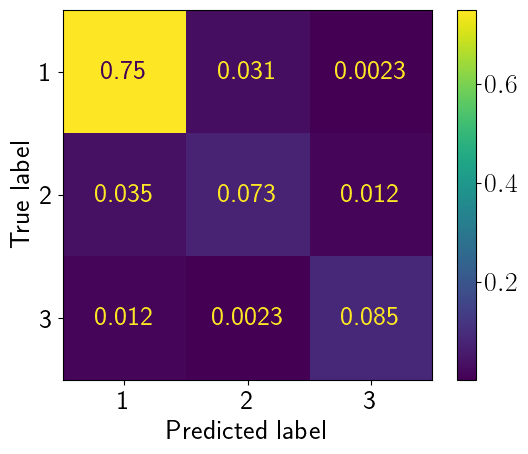

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=35)

dt_raw, acc_raw, rec_raw = apply_dt(X_train, X_test, y_train, y_test)

In this case, the accuracy score is not a good metric in evaluating the performance of the model. In fact, with high imbalanced classes, the Accuracy Paradox must be taken into account (cf. https://en.wikipedia.org/wiki/Accuracy_paradox).

## Subsampled data

Accuracy: 0.90
Recall: 0.90


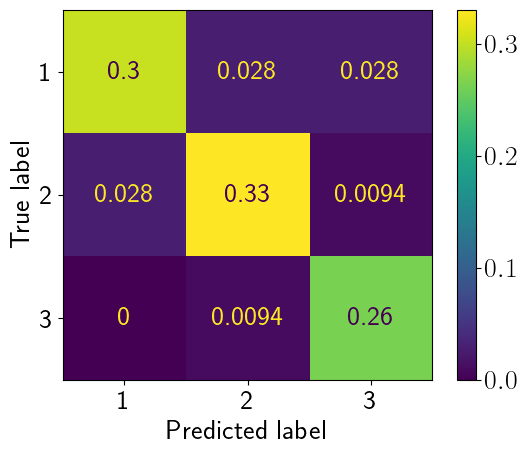

In [21]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub,y_sub,train_size=0.8,random_state=35)

dt_sub, acc_sub, rec_sub = apply_dt(X_train_sub, X_test_sub, y_train_sub, y_test_sub)

In [22]:
print("Accuracy score  -   Raw data: %.2f    Subsampled data: %.2f"%(acc_raw,acc_sub))
print("Recall score    -   Raw data: %.2f    Subsampled data: %.2f"%(rec_raw,rec_sub))

Accuracy score  -   Raw data: 0.91    Subsampled data: 0.90
Recall score    -   Raw data: 0.81    Subsampled data: 0.90


Apply now the traing method to the raw dataset as final validation:

Accuracy: 0.90
Recall: 0.81


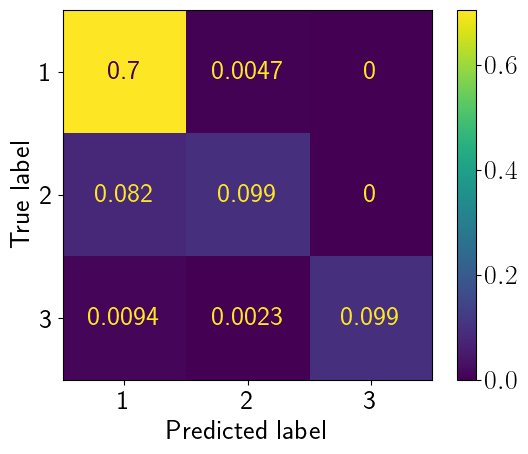

In [23]:
apply_dt(X_train, X_test, y_train, y_test, dt=dt_sub);

## Oversampled data

Accuracy: 0.98
Recall: 0.98


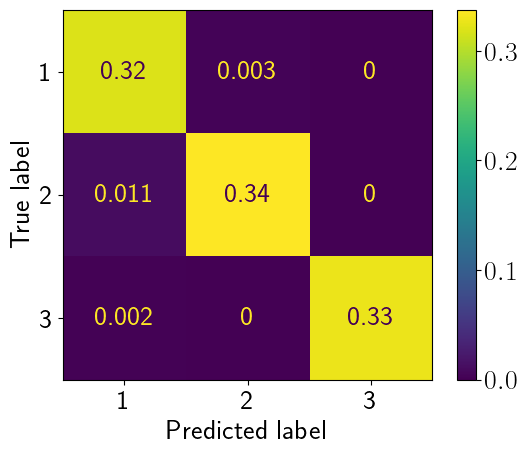

In [24]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,train_size=0.8,random_state=35)

dt_over, acc_over, rec_over = apply_dt(X_train_over, X_test_over, y_train_over, y_test_over)

In [25]:
print("Accuracy score  -   Raw data: %.2f    Oversampled data: %.2f"%(acc_raw,acc_over))
print("Recall score    -   Raw data: %.2f    Oversampled data: %.2f"%(rec_raw,rec_over))

Accuracy score  -   Raw data: 0.91    Oversampled data: 0.98
Recall score    -   Raw data: 0.81    Oversampled data: 0.98


Apply now the traing method to the raw dataset as final validation:

Accuracy: 1.00
Recall: 0.99


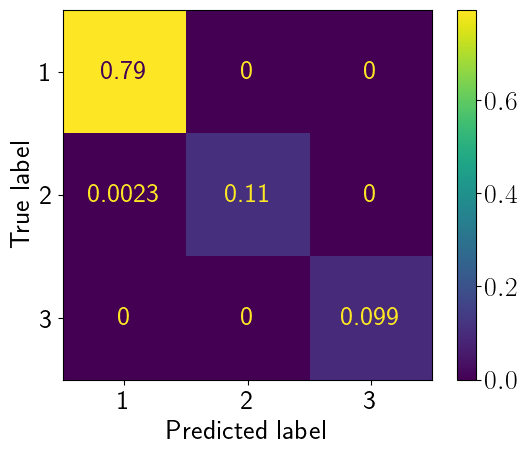

In [26]:
apply_dt(X_train, X_test, y_train, y_test, dt=dt_over);

## Oversampled data with SMOTE

Accuracy: 0.94
Recall: 0.94


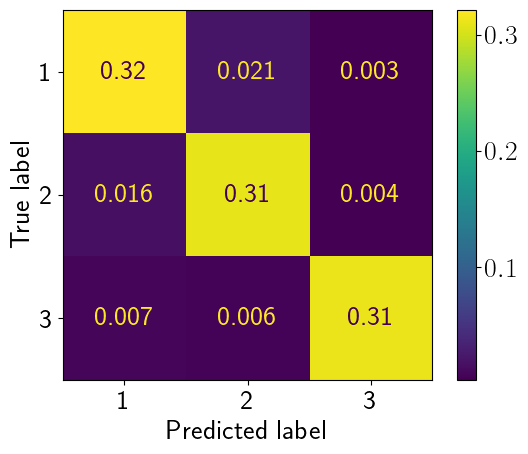

In [27]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm,train_size=0.8,random_state=35)

dt_sm, acc_sm, rec_sm = apply_dt(X_train_sm, X_test_sm, y_train_sm, y_test_sm);

In [28]:
print("Accuracy score  -   Raw data: %.2f    Oversampled data with SMOTE: %.2f"%(acc_raw,acc_sm))
print("Recall score    -   Raw data: %.2f    Oversampled data with SMOTE: %.2f"%(rec_raw,rec_sm))

Accuracy score  -   Raw data: 0.91    Oversampled data with SMOTE: 0.94
Recall score    -   Raw data: 0.81    Oversampled data with SMOTE: 0.94


Apply now the traing method to the raw dataset as final validation:

Accuracy: 0.98
Recall: 0.94


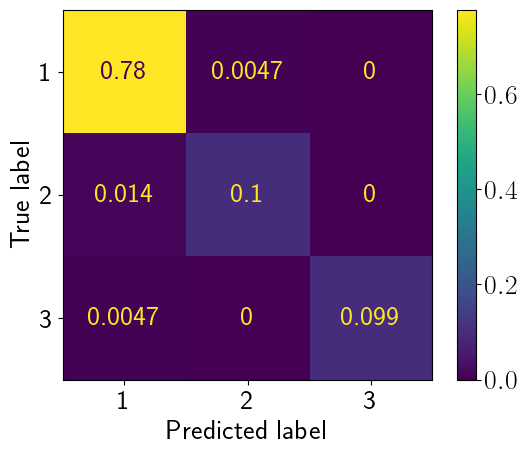

In [29]:
apply_dt(X_train, X_test, y_train, y_test, dt=dt_sm);

## Sensitivity to outliers

Accuracy: 0.92
Recall: 0.87


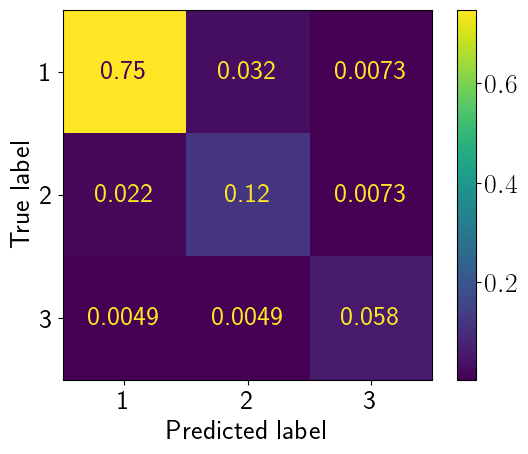

In [30]:
X_train_nout, X_test_nout, y_train_nout, y_test_nout = train_test_split(Xnout,ynout,train_size=0.8,random_state=35)

dt_nout, acc_nout, rec_nout = apply_dt(X_train_nout, X_test_nout, y_train_nout, y_test_nout);

Apply now the traing method to the raw dataset as final validation:

Accuracy: 0.98
Recall: 0.95


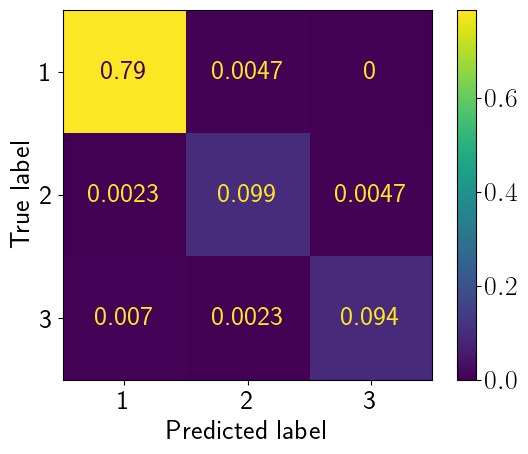

In [31]:
apply_dt(X_train, X_test, y_train, y_test, dt=dt_nout);

## Cross-approach: oversampling with SMOTE + no outliers 

In [32]:
sm = SMOTE(random_state= 31, sampling_strategy="all")

# Apply SMOTE to the dataset without outliers
X_sm_nout, y_sm_nout = sm.fit_resample(Xnout,ynout)

Accuracy: 0.97
Recall: 0.97


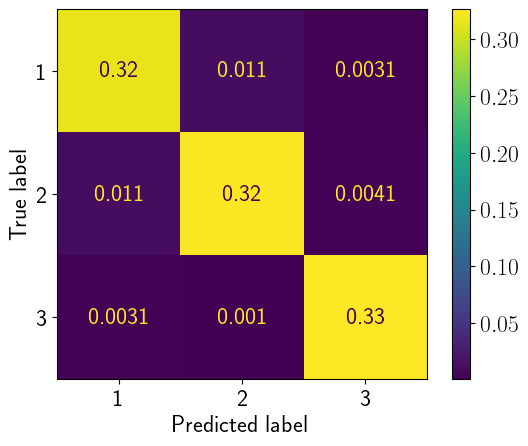

In [41]:
X_train_over_nout, X_test_over_nout, y_train_over_nout, y_test_over_nout = train_test_split(X_sm_nout, y_sm_nout,train_size=0.8,random_state=35)

dt_over_nout, acc_over_nout, rec_over_nout = apply_dt(X_train_over_nout, X_test_over_nout, y_train_over_nout, y_test_over_nout);

Apply now the traing method to the raw dataset as final validation:

Accuracy: 0.99
Recall: 0.97


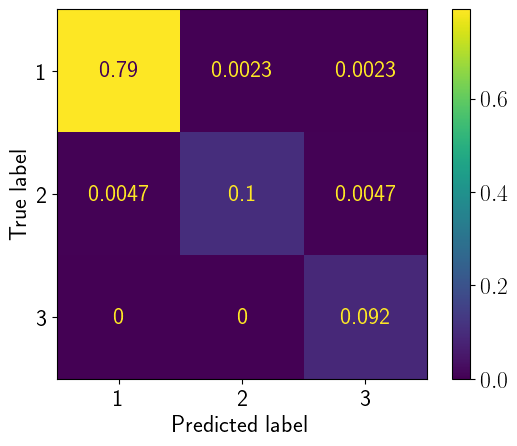

In [43]:
apply_dt(X_train, X_test, y_train, y_test, dt=dt_over_nout);

Save dataset:

In [35]:
#fnout_sm = pd.concat((X_sm_nout, y_sm_nout),axis=1)
#fnout_sm.to_csv(data_path+"prep_data.csv",index= True)